In [1]:
# importer le fichier structure
import BinomialQueueExperiment as binomialQueueExperiment
import MinHeapExperimentation as minheapExperimentation
import etude_exp as etude_exp

In [2]:
list_of_sizes = [1000, 5000 ,10000, 20000, 50000, 80000, 120000 ,200000]


[0.008831453323364259, 0.04383792877197266, 0.10623407363891602, 0.19964299201965333, 0.5209732055664062, 0.9220005989074707, 1.454597806930542, 2.6671635150909423]


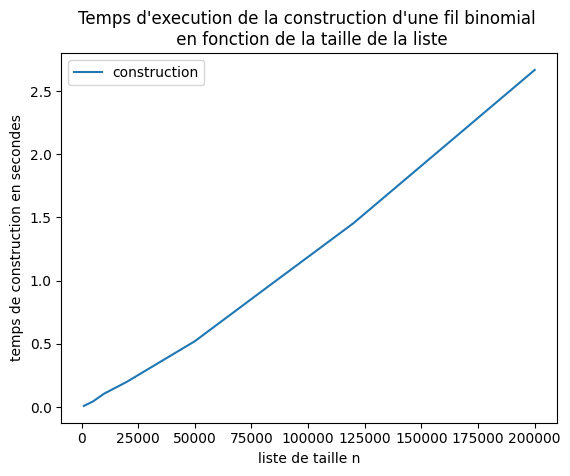

In [3]:
list_moyenne_temps_construction = binomialQueueExperiment.moyenne_temps_construction(list_of_sizes)
print (list_moyenne_temps_construction)
xlabel = "liste de taille n"
ylabel = "temps de construction en secondes"
titre = "Temps d'execution de la construction d'une fil binomial \n en fonction de la taille de la liste"
label = "construction"
nom_fichier = "binomialQueue_construction_temps.png"
binomialQueueExperiment.representation_graphique(list_of_sizes, list_moyenne_temps_construction, nom_fichier, xlabel, ylabel, titre, label,True)    


[4.2438507080078125e-05, 3.784894943237305e-05, 3.606081008911133e-05, 3.701448440551758e-05, 4.571676254272461e-05, 3.9517879486083984e-05, 5.322694778442383e-05, 4.4465065002441406e-05]


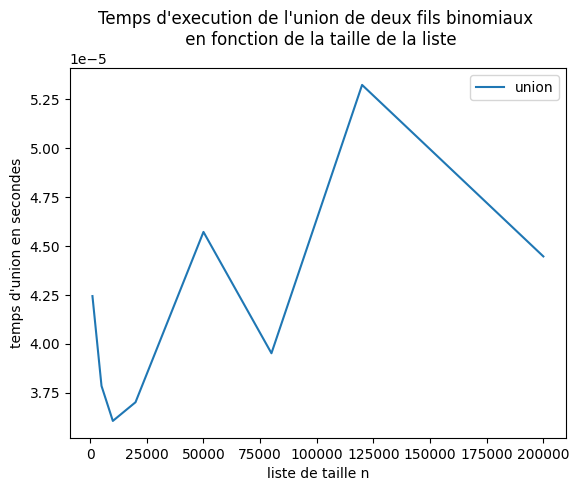

In [4]:
list_moyenne_temps_union = binomialQueueExperiment.moyenne_temps_union(list_of_sizes)
print (list_moyenne_temps_union)
xlabel = "liste de taille n"
ylabel = "temps d'union en secondes"
titre = "Temps d'execution de l'union de deux fils binomiaux \n en fonction de la taille de la liste"
label = "union"
nom_fichier = "binomialQueue_union_temps.png"
binomialQueueExperiment.representation_graphique(list_of_sizes, list_moyenne_temps_union, nom_fichier, xlabel, ylabel, titre, label, True)


On constate des piques sur cette experimentations car l'intervalle de traitement est moins importante car on a des donnes pas assez consequente 

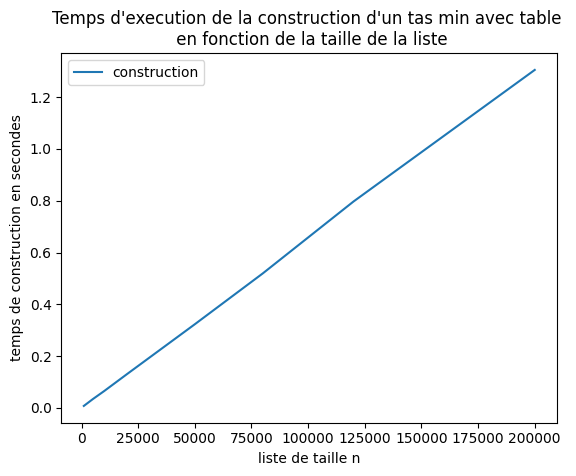

In [5]:
list_of_times = minheapExperimentation.moyenne_temps_construction_table(list_of_sizes)
xlabel = "liste de taille n"
ylabel = "temps de construction en secondes"
titre = "Temps d'execution de la construction d'un tas min avec table \n en fonction de la taille de la liste"
label = "construction"
nom_fichier = "MinHeap_construction_table_temps.png"
minheapExperimentation.representation_graphique(list_of_sizes, list_of_times, nom_fichier, xlabel, ylabel, titre, label)


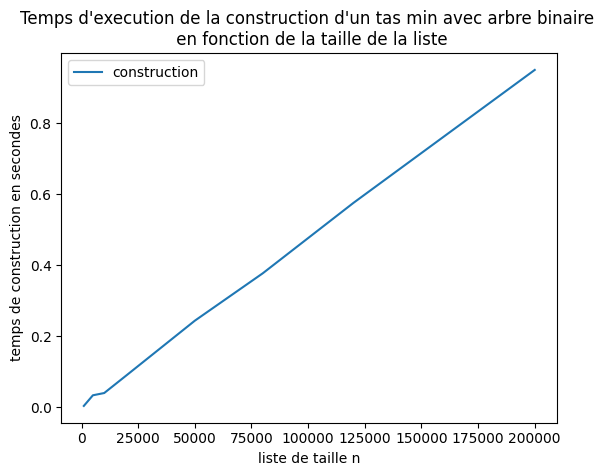

In [17]:
list_of_times = minheapExperimentation.moyenne_temps_construction_tree(list_of_sizes)
xlabel = "liste de taille n"
ylabel = "temps de construction en secondes"
titre = "Temps d'execution de la construction d'un tas min avec arbre binaire \n en fonction de la taille de la liste"
label = "construction"
nom_fichier = "MinHeap_construction_tree_temps.png"
minheapExperimentation.representation_graphique(list_of_sizes, list_of_times, nom_fichier, xlabel, ylabel, titre, label)

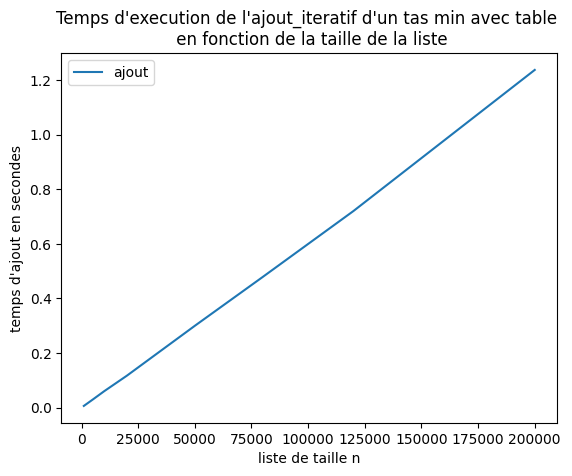

In [7]:
list_of_times = minheapExperimentation.moyenne_temps_ajoutIteratif_table(list_of_sizes)
xlabel = "liste de taille n"
ylabel = "temps d'ajout en secondes"
titre = "Temps d'execution de l'ajout_iteratif d'un tas min avec table \n en fonction de la taille de la liste"
label = "ajout"
nom_fichier = "MinHeap_ajout_table_temps.png"
minheapExperimentation.representation_graphique(list_of_sizes, list_of_times, nom_fichier, xlabel, ylabel, titre, label)


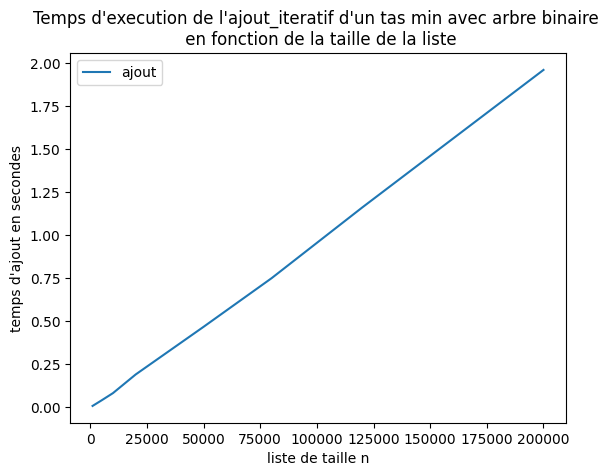

In [8]:
list_of_times = minheapExperimentation.moyenne_temps_ajoutIteratif_tree(list_of_sizes)
xlabel = "liste de taille n"
ylabel = "temps d'ajout en secondes"
titre = "Temps d'execution de l'ajout_iteratif d'un tas min avec arbre binaire \n en fonction de la taille de la liste"
label = "ajout"
nom_fichier = "MinHeap_ajout_tree_temps.png"
minheapExperimentation.representation_graphique(list_of_sizes, list_of_times, nom_fichier, xlabel, ylabel, titre, label)

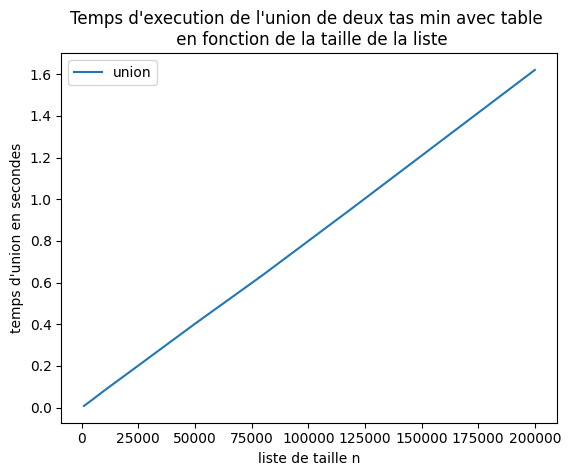

In [9]:
list_of_times = minheapExperimentation.moyenne_temps_union_table(list_of_sizes)
xlabel = "liste de taille n"
ylabel = "temps d'union en secondes"
titre = "Temps d'execution de l'union de deux tas min avec table \n en fonction de la taille de la liste"
label = "union"
nom_fichier = "MinHeap_union_table_temps.png"
minheapExperimentation.representation_graphique(list_of_sizes, list_of_times, nom_fichier, xlabel, ylabel, titre, label)


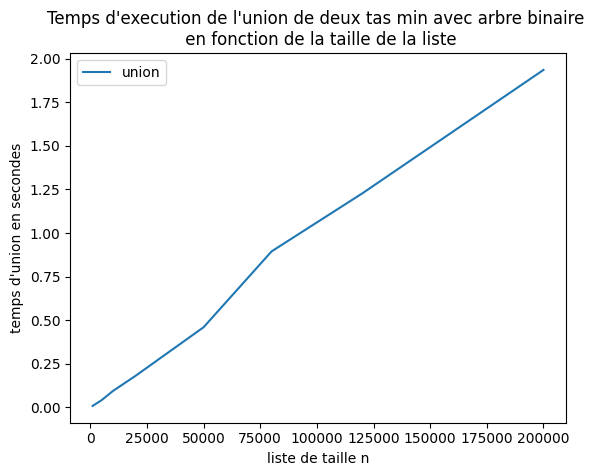

In [10]:
list_of_times = minheapExperimentation.moyenne_temps_union_tree(list_of_sizes)
xlabel = "liste de taille n"
ylabel = "temps d'union en secondes"
titre = "Temps d'execution de l'union de deux tas min avec arbre binaire \n en fonction de la taille de la liste"
label = "union"
nom_fichier = "MinHeap_union_tree_temps.png"
minheapExperimentation.representation_graphique(list_of_sizes, list_of_times, nom_fichier, xlabel, ylabel, titre, label)

In [11]:
import os
import time
import md5
import tree_search
import matplotlib.pyplot as plt
import numpy as np
import structures as st
from MinHeap import *
from BinomialQueue import *
from matplotlib import gridspec



In [12]:
tree = tree_search.search_tree()
words = []
unique_words = []
words_in_collision = []
hash_dict = {}



list_files = os.listdir("shakespeare")
# print(list_files) 
    
for file in list_files:
    f = open("shakespeare/" + file , "r")
    text = f.read()
    words_file = text.split()
    for word in words_file:
        # on ajoute le mot à la liste des mots
        words.append(word)
        hashed = md5.md5(word) # on hash le mot
        key1 = np.uint64(int(hashed[0:16], 16)) # on convertit les 16 premiers caractères du hash en int puis en uint64
        key2 = np.uint64(int(hashed[16:32], 16)) # idem pour les 16 derniers caractères
        hashed_word_cle128 = np.array(tuple((key1, key2)), dtype=st.cle128) # on crée la clé à partir de key1 et key2
         # les dictionnaires python accepte pas des types mutable (np.array) donc on convertit la clé en bytes puis en hexa 
         # et on le met comme tuple ( qui est immutable ) pour pouvoir l'utiliser comme clé de dictionnaire
        hashed_word_tuple = hashed_word_cle128.tobytes().hex()
        if not tree.search(hashed_word_cle128): # si le mot n'est pas déjà dans l'arbre
            tree.insert(hashed_word_cle128) # on l'ajoute
            if word not in unique_words: # si le mot n'est pas déjà dans la liste des mots uniques
                unique_words.append(word)
            hash_dict[hashed_word_tuple] = [word] # on ajoute le hash et le mot dans le dictionnaire
        else: 
            if hashed_word_tuple in hash_dict: # si le hash est déjà dans le dictionnaire
                if word not in hash_dict[hashed_word_tuple]: # si le mot n'est pas déjà dans la liste de mots qui ont le même hash , c'est qu'il y a une collision, on l'ajoute donc
                    hash_dict[hashed_word_tuple].append(word)     
    # close the file
    f.close()

for key in hash_dict:
    if len(hash_dict[key]) > 1:
        words_in_collision.append(hash_dict[key]) # on remplit la liste des mots en collision avec les mots qui ont le même hash


list_tree = tree.toList()
print(str(len(list_tree)))

23086


on a 0 collisions trouvées , c'est normal c'est parceque on a 128 bits hash MD5, et on a 2^128 possibilites donc on a une chance sur 2^128 de trouver une collision et on a seulement 23086 mots, ce qui est trop peu pour trouver une collision

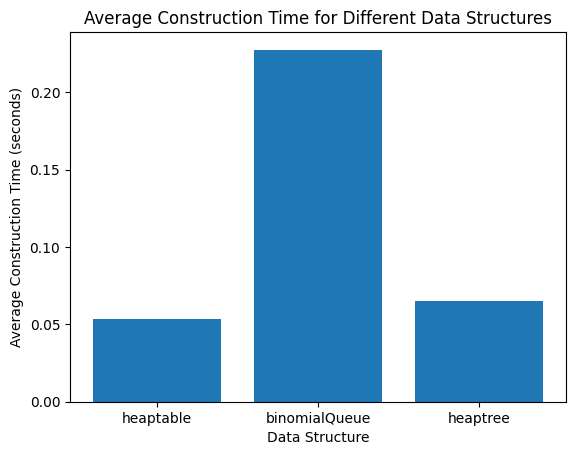

In [13]:
heaptable_times, binomialQueue_times, heaptree_times = etude_exp.moyenne_temps_construction(list_tree)
# Create a list of the average times
avg_times = [np.mean(heaptable_times), np.mean(binomialQueue_times), np.mean(heaptree_times)]

# Create a list of the names of the data structures
data_structures = ['heaptable', 'binomialQueue', 'heaptree']

plt.clf()
# Create a bar chart
plt.bar(data_structures, avg_times)

plt.xlabel('Data Structure')
plt.ylabel('Average Construction Time (seconds)')
plt.title("Average Construction Time for Different Data Structures")

plt.savefig("experiments/etude_exp/temps_de_construction.png")
# plt.show()

# Question 6.16 Comparer graphiquement les temps d’exécution des algorithmes SupprMin, Ajout,
# Construction, Union pour les deux types de structure de données : tas min et files binomiales sur les
# données extraites de la question 6.14.

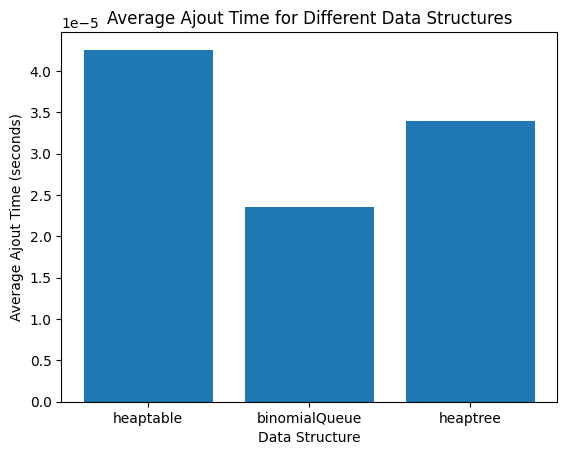

In [14]:
heaptable_times, binomialQueue_times, heaptree_times = etude_exp.moyenne_temps_ajout(list_tree)
# Create a list of the average times
avg_times = [np.mean(heaptable_times), np.mean(binomialQueue_times), np.mean(heaptree_times)]

# Create a list of the names of the data structures
data_structures = ['heaptable', 'binomialQueue', 'heaptree']

plt.clf()
# Create a bar chart
plt.bar(data_structures, avg_times)

plt.xlabel('Data Structure')
plt.ylabel('Average Ajout Time (seconds)')
plt.title("Average Ajout Time for Different Data Structures")

plt.savefig("experiments/etude_exp/temps_de_ajout.png")
plt.show()


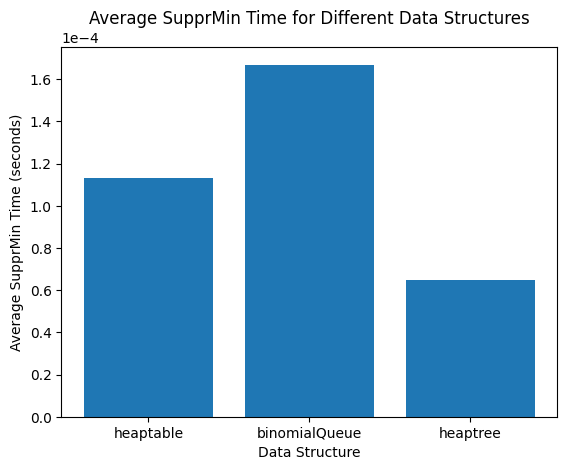

In [15]:
heaptable_times, binomialQueue_times, heaptree_times = etude_exp.moyenne_temps_supp(list_tree)

# Create a list of the average times
avg_times = [np.mean(heaptable_times), np.mean(binomialQueue_times), np.mean(heaptree_times)]

# Create a list of the names of the data structures
data_structures = ['heaptable', 'binomialQueue', 'heaptree']

plt.clf()
# Create a bar chart
plt.bar(data_structures, avg_times)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlabel('Data Structure')
plt.ylabel('Average SupprMin Time (seconds)')
plt.title("Average SupprMin Time for Different Data Structures")

plt.savefig("experiments/etude_exp/temps_de_supp.png")


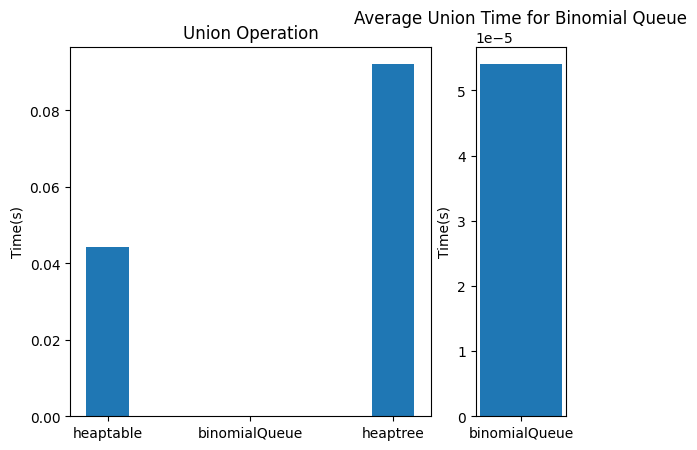

In [16]:
heaptable_times, binomialQueue_times, heaptree_times = etude_exp.moyenne_temps_union(list_tree)

# Create a list of the average times
avg_times = [np.mean(heaptable_times), np.mean(binomialQueue_times), np.mean(heaptree_times)]
avg_sub_times = [avg_times[1]]
# Create a list of the names of the data structures
data_structures = ['heaptable', 'binomialQueue', 'heaptree']
data_sub_structures = ['binomialQueue']
plt.clf()
gride = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
ax0 = plt.subplot(gride[0])
ax1 = plt.subplot(gride[1])
plt.subplot(1,2,1)
plt.title("Union Operation")
plt.ylabel("Time(s)")
ax0.bar (data_structures, avg_times, width=0.3)
plt.subplot(1,2,2)
ax1.bar (data_sub_structures, avg_sub_times, width=0.3)
plt.ylabel("Time(s)")
plt.title("Average Union Time for Binomial Queue")
# plt.show()

plt.savefig("experiments/etude_exp/temps_de_union.png")